<class 'numpy.ndarray'>
(256, 256, 3)
65536


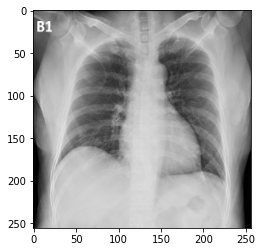

In [12]:
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from skimage import io
import os

a = np.load("project_data/features/test/0000.npy")
#print(a)


im = io.imread('project_data/images/train/corona/0728.jpeg', as_gray=True)

  
# Read Images 
img = mpimg.imread('project_data/images/train/corona/0728.jpeg') 

#img.shape 
plt.imshow(im)
print(type(im))

plt.imshow(img)
print(img.shape)

print(256*256)

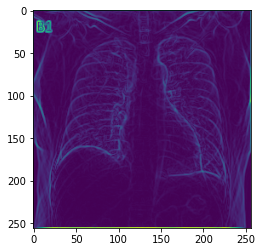

In [13]:
from scipy import ndimage

sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)
plt.imshow(sob)

In [3]:
#prendiamo il file txt dei label e lo useremo dopo come discriminatore per il for. tutto ciò per metterli in ordine
file_label = open("project_data/labels/train_labels.txt", "r")
val_labels = open("project_data/labels/val_labels.txt", "r")
bho = [(line.strip()).split() for line in file_label]
numeri_test = [numero[0] for numero in bho]
y_train = [nome[1] for nome in bho]

dio = [(line.strip()).split() for line in val_labels]
numeri_val = [numero[0] for numero in dio]
y_val = [nome[1] for nome in dio]


#X_train è unsorted
#X_train contiene tutte le immagini ma non sono sortate per nome
import glob
X_train = []
X_val = []
nome_cartella = ["bacteria", "corona", "normal", "viral"]

for numero in numeri_test:
    for cartella in nome_cartella:
        for img in glob.glob("project_data/images/train/{}/{}.jpeg".format(cartella, numero)):
            n = io.imread(img, as_gray=True)
            n = np.reshape(n,65536)
            n = n.tolist()
            X_train.append(n) 
for numero in numeri_val:
    for cartella in nome_cartella:
        for img in glob.glob("project_data/images/val/{}/{}.jpeg".format(cartella, numero)):
            n = io.imread(img, as_gray=True)
            n = np.reshape(n,65536)
            n = n.tolist()
            X_val.append(n) 

In [24]:
#print((X_train[0]))
print(len(X_train[0]))
#plt.imshow(X_train[0])

65536


In [28]:
X_train_sob=[]
for im in X_train: 
    sx = ndimage.sobel(im, axis=0, mode='constant')
    sy = ndimage.sobel(im, mode='constant')
    sob = np.hypot(sx, sy)
    X_train_sob.append(sob)
print(len(X_train_sob[0]))

65536


In [29]:
print(X_train_sob[0])

[0.         0.00554594 0.         ... 0.         0.         0.        ]


In [30]:
X_val_sob = []
for im in X_val: 
    sx = ndimage.sobel(im, axis=0, mode='constant')
    sy = ndimage.sobel(im, mode='constant')
    sob = np.hypot(sx, sy)
    X_val_sob.append(sob)

In [31]:
import numpy as np 

X_train_sob = np.stack(X_train_sob, axis = 0)

X_train_sob.shape
#plt.imshow(X_train[0])

(3569, 65536)

In [46]:
from sklearn.ensemble import RandomForestClassifier

clf_rand = RandomForestClassifier(n_estimators = 800, max_leaf_nodes = 25, n_jobs = -1)
clf_rand.fit(X_train_sob, y_train)

y_pred = clf_rand.predict(X_val_sob)
#print(y_pred)
from sklearn.metrics import accuracy_score, recall_score
accuracy_score(y_val , y_pred)

0.6980656013456686

In [38]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train_sob, y_train)
from collections import Counter
print(sorted(Counter(y_resampled).items()))


[('COVID-19', 1664), ('bacteria', 1664), ('normal', 1664), ('viral', 1664)]


In [41]:
from sklearn.ensemble import RandomForestClassifier

clf_rand = RandomForestClassifier(n_estimators = 800, max_leaf_nodes = 25, n_jobs = -1)
clf_rand.fit(X_resampled, y_resampled)

y_pred = clf_rand.predict(X_val)

In [45]:
accuracy_score(y_val , y_pred)

0.2624053826745164